In [2]:
from google.oauth2 import service_account
from google.cloud import storage
import nibabel as nib
import os
import pandas as pd
import tensorflow as tf
import gcsfs
import random
from nilearn import image
import numpy as np

/Users/tobiasbraun/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
#first create this file via IAM management on Google Cloud Platform
#change path
file_path = '/Users/tobiasbraun/Documents/Studium USA/Columbia University/Semester 3/Deep Learning/Codes/Project/'
api_key = file_path + "deep-learning-255016-4350337ed6f4.json"
credentials = service_account.Credentials.from_service_account_file(api_key)
client = storage.Client(credentials=credentials, project="deep-learning")

In [4]:
fs = gcsfs.GCSFileSystem(token=api_key, project="deep-learning")
with fs.open('mri_data_bucket/ADNI_t1_list_with_fsstatus_20190111.csv') as f:
    df = pd.read_csv(f)

df.to_csv('labels.csv')

In [5]:
bucket_name = "mri_data_bucket"
bucket = client.get_bucket(bucket_name)
prefix = "data"

In [6]:
bucket = client.get_bucket(bucket_name)
blobs = bucket.list_blobs(prefix=prefix)

file_names_list = []
for blob in blobs:
        file_names_list.append(blob.name)


In [8]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))

In [9]:
labels=df[['Subject','T1.SERIESID','Group']].copy()

labels=labels[(labels.Group == 'CN')|(labels.Group == 'AD')|(labels.Group == 'EMCI')|(labels.Group == 'LMCI')|(labels.Group == 'MCI')]

labels['new_ind']=labels['Subject']+"_"+labels['T1.SERIESID'].astype(str)
labels.loc[labels.Group == 'CN','Group']=0
labels.loc[labels.Group == 'AD','Group']=1
labels.loc[labels.Group == 'EMCI','Group']=2
labels.loc[labels.Group == 'LMCI','Group']=3
labels.loc[labels.Group == 'MCI','Group']=4
labels = labels.set_index('new_ind')
labels=labels.drop(columns=['Subject','T1.SERIESID'])

labels.shape

(9648, 1)

In [10]:
#file_names=file_names
#file_names
len(file_names_list)

10435

In [11]:
import re
pattern1 = re.compile(r'S\d+')
pattern2 = re.compile(r'\d+_S_\d+')

In [21]:
# def download(file_names):
#     count=0
#     for filename in file_names:
#         filename=filename[5:]
#         try:
#             series_id = re.search(pattern1, filename).group(0)[1:]
#             subject = re.search(pattern2,filename).group(0)
#             ind=subject+"_"+series_id

#             label=labels.loc[ind,'Group']          
#             blob = bucket.blob('data/'+filename)
#             blob.download_to_filename('data/'+filename)
#             count+=1

#             if count % 100 ==0:
#                 print(count)
#         except:
#             continue
# download(file_names_list)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600


In [22]:
# def normalise(file_names):
#     count=0

#     min_x,min_y,min_z=np.ones(156**2)*np.inf,np.ones(156**2)*np.inf,np.ones(156**2)*np.inf
#     max_x,max_y,max_z=np.zeros(156**2),np.zeros(156**2),np.zeros(156**2)

#     for filename in file_names:
#         filename=filename[5:]
#         try:
#             image_ = nib.load('data/'+filename)
#             image = image_.get_data()
#             x=image[127,50:206,50:206]
#             x=np.array(x.ravel())
            
#             y=image[50:206,127,50:206]
#             y=np.array(y.ravel())
            
#             z=image[50:206,50:206,127]
#             z=np.array(z.ravel())
                       
#             min_x=np.amin(np.array([min_x,x]), axis=0)
#             min_y=np.amin(np.array([min_y,y]), axis=0)
#             min_z=np.amin(np.array([min_z,z]), axis=0)
            
#             max_x=np.amax(np.array([max_x,x]), axis=0)
#             max_y=np.amax(np.array([max_y,y]), axis=0)
#             max_z=np.amax(np.array([max_z,z]), axis=0)
#             count+=1
#             if count % 100 ==0:
#                 print(count)
#         except:
#             continue
            
#     min_ = [min_x, min_y, min_z]
#     max_ = [max_x, max_y, max_z]
#     return min_, max_

In [12]:
# for filename in file_names_list[7:10]:
#     filename=filename[5:]
    
#     image_ = nib.load('data/'+filename)
#     print('a')

#     image = image_.get_data()

#     x=image[127,50:216,50:216]
#     x=np.array(x.ravel())

#     y=image[50:216,127,50:216]
#     y=np.array(y.ravel())

#     z=image[50:216,50:216,127]
#     z=np.array(z.ravel())

#     min_x=np.amin(np.array([min_x,x]), axis=0)
#     min_y=np.amin(np.array([min_y,y]), axis=0)
#     min_z=np.amin(np.array([min_z,z]), axis=0)

#     max_x=np.amax(np.array([max_x,x]), axis=0)
#     max_y=np.amax(np.array([max_y,y]), axis=0)
#     max_z=np.amax(np.array([max_z,z]), axis=0)
#     count+=1

In [23]:
# min_flat, max_flat = normalise(file_names_list)


100
200
300
400
500
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600


In [24]:
np.save('Normalizing_files/min_flat_x_full_dataset',min_flat[0])
np.save('Normalizing_files/max_flat_x_full_dataset',max_flat[0])

np.save('Normalizing_files/min_flat_y_full_dataset',min_flat[1])
np.save('Normalizing_files/max_flat_y_full_dataset',max_flat[1])

np.save('Normalizing_files/min_flat_z_full_dataset',min_flat[2])
np.save('Normalizing_files/max_flat_z_full_dataset',max_flat[2])

In [25]:
min_flat_x = np.load('Normalizing_files/min_flat_x.npy')
max_flat_x = np.load('Normalizing_files/max_flat_x.npy')

min_flat_y = np.load('Normalizing_files/min_flat_y.npy')
max_flat_y = np.load('Normalizing_files/max_flat_y.npy')

min_flat_z = np.load('Normalizing_files/min_flat_z.npy')
max_flat_z = np.load('Normalizing_files/max_flat_z.npy')

In [16]:
import re
pattern1 = re.compile(r'S\d+')
pattern2 = re.compile(r'\d+_S_\d+')

In [51]:
file_names=pd.DataFrame()
for filename in file_names_list:
    row=dict()
    row['filename']=filename[5:]
    filename=filename[5:]
    try:
        series_id = re.search(pattern1, filename).group(0)[1:]
        subject = re.search(pattern2,filename).group(0)
        ind=subject+"_"+series_id
        row['ind']=ind
        row['label']=labels.loc[ind,'Group'] 
    except:
        row['ind']= 'No label'
        row['label']= 'No label'   
    file_names=file_names.append(row,ignore_index=True)

file_names = file_names[file_names['ind']!='No label']
file_names[:20]

,filename,ind,label
1,002_S_0295_S110476-T1_T1_brain_mni305.nii,002_S_0295_110476,0
2,002_S_0295_S13408_T1_brain_mni305.nii,002_S_0295_13408,0
3,002_S_0295_S150055-T1_T1_brain_mni305.nii,002_S_0295_150055,0
4,002_S_0295_S21856_T1_brain_mni305.nii,002_S_0295_21856,0
5,002_S_0295_S32678_T1_brain_mni305.nii,002_S_0295_32678,0
6,002_S_0295_S54061_T1_brain_mni305.nii,002_S_0295_54061,0
7,002_S_0295_S67612_T1_brain_mni305.nii,002_S_0295_67612,0
8,002_S_0295_S84944_T1_brain_mni305.nii,002_S_0295_84944,0
10,002_S_0413_S111992-T1_T1_brain_mni305.nii,002_S_0413_111992,0
11,002_S_0413_S13893_T1_brain_mni305.nii,002_S_0413_13893,0


In [52]:
# shuffle table:
file_names = file_names.sample(frac=1)

In [56]:
cut = int(len(file_names)/10)

testing_file_names = file_names[:cut]
# validation_file_names 

964

Class 0: 3033
Class 1: 1241
Class 2: 1803
Class 3: 866
Class 4: 2705
Proportion: 2.44 : 1


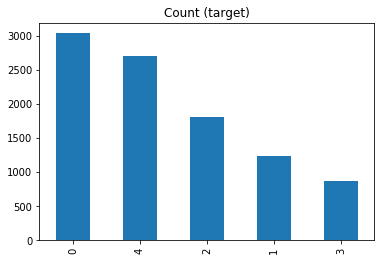

In [28]:
target_count = file_names.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])
print('Class 3:', target_count[3])
print('Class 4:', target_count[4])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

In [19]:
# sample filenames:
training_file_names=pd.DataFrame()
testing_file_names=pd.DataFrame()
for index, row in file_names.iterrows():
    u=np.random.rand()
    if u<0.8:
        training_file_names=training_file_names.append(row,ignore_index=True)
    else:
        testing_file_names=testing_file_names.append(row,ignore_index=True)
training_file_names[:10]

,filename,ind,label
0,002_S_0295_S110476-T1_T1_brain_mni305.nii,002_S_0295_110476,0.0
1,002_S_0295_S13408_T1_brain_mni305.nii,002_S_0295_13408,0.0
2,002_S_0295_S150055-T1_T1_brain_mni305.nii,002_S_0295_150055,0.0
3,002_S_0295_S32678_T1_brain_mni305.nii,002_S_0295_32678,0.0
4,002_S_0295_S67612_T1_brain_mni305.nii,002_S_0295_67612,0.0
5,002_S_0295_S84944_T1_brain_mni305.nii,002_S_0295_84944,0.0
6,002_S_0413_S111992-T1_T1_brain_mni305.nii,002_S_0413_111992,0.0
7,002_S_0413_S13893_T1_brain_mni305.nii,002_S_0413_13893,0.0
8,002_S_0413_S14781-T1_T1_brain_mni305.nii,002_S_0413_14781,0.0
9,002_S_0413_S150697-T1_T1_brain_mni305.nii,002_S_0413_150697,0.0


In [20]:
# Class count
count_class_0, count_class_1 = training_file_names.label.value_counts()

# Divide by class
df_class_0 = training_file_names[training_file_names['label'] == 0]
df_class_1 = training_file_names[training_file_names['label'] == 1]

Random over-sampling:
1.0    2382
0.0    2382
Name: label, dtype: int64


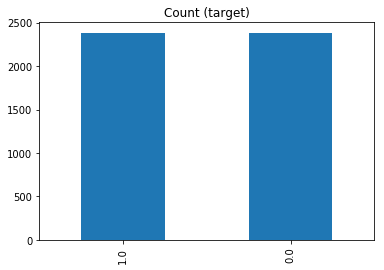

In [21]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
training_file_names_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(training_file_names_over.label.value_counts())
training_file_names_over.label.value_counts().plot(kind='bar', title='Count (target)')

In [22]:
training_file_names_over = training_file_names_over.sample(frac=1).reset_index(drop=True)
training_file_names_over[:10]

,filename,ind,label
0,023_S_6399_S690743_T1_brain_mni305.nii,023_S_6399_690743,0.0
1,130_S_1337_S28790_T1_brain_mni305.nii,130_S_1337_28790,1.0
2,023_S_0083_S45193_T1_brain_mni305.nii,023_S_0083_45193,1.0
3,027_S_0404_S22840_T1_brain_mni305.nii,027_S_0404_22840,1.0
4,036_S_0672_S55246_T1_brain_mni305.nii,036_S_0672_55246,0.0
5,023_S_1190_S102254_T1_brain_mni305.nii,023_S_1190_102254,0.0
6,094_S_0526_S14560_T1_brain_mni305.nii,094_S_0526_14560,0.0
7,016_S_4952_S169422_T1_brain_mni305.nii,016_S_4952_169422,0.0
8,033_S_0739_S26702_T1_brain_mni305.nii,033_S_0739_26702,1.0
9,016_S_5057_S190957_T1_brain_mni305.nii,016_S_5057_190957,1.0


In [23]:
# Class count
count_class_0, count_class_1 = testing_file_names.label.value_counts()

# Divide by class
df_class_0 = testing_file_names[testing_file_names['label'] == 0]
df_class_1 = testing_file_names[testing_file_names['label'] == 1]

Random over-sampling:
1    651
0    651
Name: label, dtype: int64


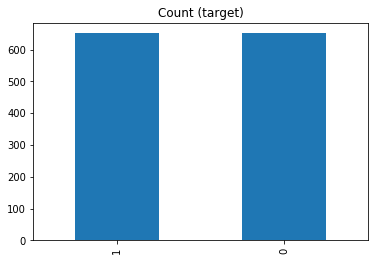

In [24]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
testing_file_names_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(testing_file_names_over.label.value_counts())
testing_file_names_over.label.value_counts().plot(kind='bar', title='Count (target)')

In [25]:
testing_file_names_over = testing_file_names_over.sample(frac=1).reset_index(drop=True)
testing_file_names_over[:10]

,filename,ind,label
0,098_S_0884_S24184_T1_brain_mni305.nii,098_S_0884_24184,1
1,129_S_4396_S645526-T1_T1_brain_mni305.nii,129_S_4396_645526,0
2,021_S_0642_S25532_T1_brain_mni305.nii,021_S_0642_25532,1
3,029_S_0824_S39315_T1_brain_mni305.nii,029_S_0824_39315,0
4,114_S_0166_S183237_T1_brain_mni305.nii,114_S_0166_183237,0
5,114_S_0979_S60750_T1_brain_mni305.nii,114_S_0979_60750,1
6,073_S_1207_S26777_T1_brain_mni305.nii,073_S_1207_26777,1
7,035_S_4082_S192870-T1_T1_brain_mni305.nii,035_S_4082_192870,0
8,027_S_0120_S216034_T1_brain_mni305.nii,027_S_0120_216034,0
9,130_S_4730_S192143-T1_T1_brain_mni305.nii,130_S_4730_192143,1


In [26]:
training_file_names_over.to_csv('training_file_names_over.csv')
testing_file_names_over.to_csv('testing_file_names_over.csv')

In [27]:
def write_tfrecords(save_filename,file_names,min_,max_):
    AD=0
    CN=0
    writer = tf.python_io.TFRecordWriter(save_filename)
    for index, row in file_names.iterrows():
        filename=row['filename']
        label=int(row['label'])
        try:
            image_ = nib.load('data/'+filename)
            crop_image = image_.get_data()
            im=crop_image[127,50:206,50:206]
            normalized_im=(im.ravel()-min_)/(max_+0.0001-min_)
            feature = {'train/label': _int64_feature(label),
                   'train/image': _float_feature(normalized_im)}
        
            # Create an example protocol buffer - Protocol buffers are a cross-platform, 
            #    cross-language library for efficient serialization of structured data.
            example = tf.train.Example(features=tf.train.Features(feature=feature))
            # Serialize to string and write on the file
            writer.write(example.SerializeToString())

            if label==1:
                AD+=1
            else:
                CN+=1
            if CN%50==0:
                print('AD: ',AD)
                print('CN: ',CN)
        except:
            continue

    writer.close()
    print(save_filename,'AD: ',AD)
    print(save_filename,'CN: ',CN)

In [ ]:
write_tfrecords('training_flat_x_156.tfrecords',training_file_names_over,min_flat_x,max_flat_x)
write_tfrecords('testing_flat_x_156.tfrecords',testing_file_names_over,min_flat_x,max_flat_x)

AD:  44
CN:  50
AD:  85
CN:  100
AD:  86
CN:  100
AD:  87
CN:  100
AD:  142
CN:  150
AD:  254
CN:  250
AD:  255
CN:  250
AD:  322
CN:  300
AD:  323
CN:  300
AD:  368
CN:  350
AD:  369
CN:  350
AD:  370
CN:  350
AD:  407
CN:  400
AD:  442
CN:  450
AD:  481
CN:  500
AD:  482
CN:  500
AD:  483
CN:  500
AD:  484
CN:  500
AD:  520
CN:  550
AD:  521
CN:  550
AD:  522
CN:  550
AD:  560
CN:  600
AD:  561
CN:  600
AD:  562
CN:  600
AD:  563
CN:  600
AD:  603
CN:  650
AD:  604
CN:  650
AD:  642
CN:  700
AD:  681
CN:  750
AD:  735
CN:  800
AD:  787
CN:  850
AD:  881
CN:  950
AD:  936
CN:  1000
AD:  937
CN:  1000
AD:  938
CN:  1000
AD:  939
CN:  1000
AD:  976
CN:  1050
AD:  977
CN:  1050
AD:  1022
CN:  1100
AD:  1023
CN:  1100
AD:  1069
CN:  1150
AD:  1122
CN:  1200
AD:  1176
CN:  1250
AD:  1177
CN:  1250
AD:  1178
CN:  1250
AD:  1261
CN:  1300
AD:  1319
CN:  1350
AD:  1320
CN:  1350
AD:  1410
CN:  1450
AD:  1453
CN:  1500
AD:  1454
CN:  1500
AD:  1487
CN:  1550
AD:  1553
CN:  1600
AD:  1614
CN:  

In [ ]:
def write_tfrecords(save_filename,file_names,min_,max_):
    AD=0
    CN=0
    writer = tf.python_io.TFRecordWriter(save_filename)
    for index, row in file_names.iterrows():
        filename=row['filename']
        label=int(row['label'])
        try:
            image_ = nib.load('data/'+filename)
            crop_image = image_.get_data()
            im=crop_image[50:206,127,50:206]
            normalized_im=(im.ravel()-min_)/(max_+0.0001-min_)
            feature = {'train/label': _int64_feature(label),
                   'train/image': _float_feature(normalized_im)}
        
            # Create an example protocol buffer - Protocol buffers are a cross-platform, 
            #    cross-language library for efficient serialization of structured data.
            example = tf.train.Example(features=tf.train.Features(feature=feature))
            # Serialize to string and write on the file
            writer.write(example.SerializeToString())

            if label==1:
                AD+=1
            else:
                CN+=1
            if CN%50==0:
                print('AD: ',AD)
                print('CN: ',CN)
        except:
            continue

    writer.close()
    print(save_filename,'AD: ',AD)
    print(save_filename,'CN: ',CN)


In [30]:
write_tfrecords('training_flat_y_156.tfrecords',training_file_names_over,min_flat_y,max_flat_y)
write_tfrecords('testing_flat_y_156.tfrecords',testing_file_names_over,min_flat_y,max_flat_y)

AD:  296
CN:  300
AD:  333
CN:  350
AD:  382
CN:  400
AD:  383
CN:  400
AD:  384
CN:  400
AD:  429
CN:  450
AD:  486
CN:  500
AD:  534
CN:  550
AD:  535
CN:  550
AD:  599
CN:  600
AD:  600
CN:  600
AD:  601
CN:  600
AD:  602
CN:  600
AD:  603
CN:  600
AD:  604
CN:  600
AD:  650
CN:  650
AD:  651
CN:  650
testing_flat_y_156.tfrecords AD:  651
testing_flat_y_156.tfrecords CN:  651


In [ ]:
def write_tfrecords(save_filename,file_names,min_,max_):
    AD=0
    CN=0
    writer = tf.python_io.TFRecordWriter(save_filename)
    for index, row in file_names.iterrows():
        filename=row['filename']
        label=int(row['label'])
        try:
            image_ = nib.load('data/'+filename)
            crop_image = image_.get_data()
            im=crop_image[50:206,50:206,127]
            normalized_im=(im.ravel()-min_)/(max_+0.0001-min_)
            feature = {'train/label': _int64_feature(label),
                   'train/image': _float_feature(normalized_im)}
        
            # Create an example protocol buffer - Protocol buffers are a cross-platform, 
            #    cross-language library for efficient serialization of structured data.
            example = tf.train.Example(features=tf.train.Features(feature=feature))
            # Serialize to string and write on the file
            writer.write(example.SerializeToString())

            if label==1:
                AD+=1
            else:
                CN+=1
            if CN%50==0:
                print('AD: ',AD)
                print('CN: ',CN)
        except:
            continue

    writer.close()
    print(save_filename,'AD: ',AD)
    print(save_filename,'CN: ',CN)

In [ ]:
write_tfrecords('training_flat_z_156.tfrecords',training_file_names_over,min_flat_z,max_flat_z)
write_tfrecords('testing_flat_z_156.tfrecords',testing_file_names_over,min_flat_z,max_flat_z)

AD:  44
CN:  50
AD:  85
CN:  100
AD:  86
CN:  100
AD:  87
CN:  100
AD:  142
CN:  150
AD:  191
CN:  200
AD:  254
CN:  250
AD:  255
CN:  250
AD:  321
CN:  300
AD:  322
CN:  300
AD:  323
CN:  300
AD:  368
CN:  350
AD:  369
CN:  350
AD:  370
CN:  350
AD:  407
CN:  400
AD:  442
CN:  450
AD:  481
CN:  500
AD:  482
CN:  500
AD:  483
CN:  500
AD:  484
CN:  500
AD:  520
CN:  550
AD:  521
CN:  550
AD:  522
CN:  550
AD:  560
CN:  600
AD:  561
CN:  600
AD:  562
CN:  600
AD:  563
CN:  600
AD:  603
CN:  650
AD:  604
CN:  650
AD:  642
CN:  700
AD:  735
CN:  800
AD:  787
CN:  850
AD:  831
CN:  900
AD:  881
CN:  950
AD:  936
CN:  1000
AD:  937
CN:  1000
AD:  938
CN:  1000
AD:  939
CN:  1000
AD:  1022
CN:  1100
AD:  1023
CN:  1100
AD:  1069
CN:  1150
AD:  1122
CN:  1200
AD:  1176
CN:  1250
AD:  1177
CN:  1250
AD:  1178
CN:  1250
AD:  1261
CN:  1300
AD:  1319
CN:  1350
AD:  1320
CN:  1350
AD:  1350
CN:  1400
AD:  1351
CN:  1400
AD:  1410
CN:  1450
AD:  1453
CN:  1500
AD:  1454
CN:  1500
AD:  1487
CN:  15

In [ ]:
# # # all files 
# file_names=file_names_list

# # sample filenames:
# training_file_names=[]
# validation_file_names=[]
# testing_file_names=[]
# for filename in file_names:
#     u=np.random.rand()
#     if u<0.7:
#         training_file_names.append(filename)
#     elif (u>0.7)&(u<0.85):
#         validation_file_names.append(filename)
#     else:
#         testing_file_names.append(filename)
# write_tfrecords('training_80.tfrecords',training_file_names)
# write_tfrecords('validation_80.tfrecords',validation_file_names)
# write_tfrecords('testing_80.tfrecords',testing_file_names)

In [ ]:
# # first 2000 files 
# file_names=file_names_list[1:2001]
# # sample filenames:
# training_file_names=[]
# validation_file_names=[]
# testing_file_names=[]
# for filename in file_names:
#     u=np.random.rand()
#     if u<0.7:
#         training_file_names.append(filename)
#     elif (u>0.7)&(u<0.85):
#         validation_file_names.append(filename)
#     else:
#         testing_file_names.append(filename)

# write_tfrecords('training_80_small.tfrecords',training_file_names)
# write_tfrecords('validation_80_small.tfrecords',validation_file_names)
# write_tfrecords('testing_80_small.tfrecords',testing_file_names)

In [ ]:
# train_filename = 'training_80_small.tfrecords'
# validation_filename= 'validation_80_small.tfrecords'
# testing_filename='testing_80_small.tfrecords'
# # open the file
# i=0
# AD=0
# CN=0
# train_i=0
# test_i=0
# val_i=0

# for filename in file_names:
#     filename=filename[5:]
#     u=np.random.rand()
    
#     if u<0.7:
#         writer = tf.python_io.TFRecordWriter(train_filename)
#     elif (u>0.7)&(u<0.85):
#         writer = tf.python_io.TFRecordWriter(validation_filename)
#     else:
#         writer = tf.python_io.TFRecordWriter(testing_filename)  
        
#     try:
#         series_id = re.search(pattern1, filename).group(0)[1:]
#         subject = re.search(pattern2,filename).group(0)
#         ind=subject+"_"+series_id

#         label=labels.loc[ind,'Group']
# #         if label==1:
# #             label=[0,1]
# #         else:
# #             label=[1,0]

#         if label==1:
#             AD+=1
#         else:
#             CN+=1
         
#         blob = bucket.blob('data/'+filename)
#         blob.download_to_filename('data_temp/'+filename)
#         image_ = nib.load('data_temp/'+filename)
#         crop_image = image.image._crop_img_to(image_,[slice(88,168),slice(88,168),slice(88,168)])
#         feature = {'train/label': _int64_feature(label),
#                'train/image': _float_feature(crop_image.get_data().ravel())}

#         # Create an example protocol buffer - Protocol buffers are a cross-platform, 
#         #    cross-language library for efficient serialization of structured data.
#         example = tf.train.Example(features=tf.train.Features(feature=feature))
#         # Serialize to string and write on the file
#         writer.write(example.SerializeToString())
#         os.remove('data_temp/'+filename)
#         i+=1
        
#         if u<0.7:
#             train_i+=1
#             print('train',train_i)
#         elif (u>0.7)&(u<0.85):
#             val_i+=1
#             print('val',val_i)
#         else:
#             test_i+=1
#             print('test',test_i)
#         print('AD: ',AD)
#         print('CN: ',CN)
#     except:
#         continue
# print('AD: ',AD)
# print('CN: ',CN)

# writer.close()